## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [5]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 355us/step - loss: 1.9892 - acc: 0.2553 - val_loss: 1.8261 - val_acc: 0.3244
Epoch 2/500
50000/50000 [==============================] - 17s 337us/step - loss: 1.7774 - acc: 0.3529 - val_loss: 1.7413 - val_acc: 0.3775
Epoch 3/500
50000/50000 [==============================] - 17s 343us/step - loss: 1.6828 - acc: 0.3913 - val_loss: 1.6460 - val_acc: 0.4065
Epoch 4/500
50000/50000 [==============================] - 17s 334us/step - loss: 1.6176 - acc: 0.4189 - val_loss: 1.5629 - val_acc: 0.4387
Epoch 5/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.5569 - acc: 0.4420 - val_loss: 1.5361 - val_acc: 0.4491
Epoch 6/500
50000/50000 [==============================] - 17s 338us/step - loss: 1.5182 - acc: 0.4563 - val_loss: 1.5576 - val_acc: 0.4439
Epoch 7/500
50000/50000 [==============================] - 17s 347us/step - loss: 1.4747 - acc: 0.4732 - val_l

Epoch 59/500
50000/50000 [==============================] - 17s 330us/step - loss: 0.5735 - acc: 0.7950 - val_loss: 1.9818 - val_acc: 0.5175
Epoch 60/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.5768 - acc: 0.7927 - val_loss: 2.0166 - val_acc: 0.5139
Epoch 61/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.5527 - acc: 0.8007 - val_loss: 2.0392 - val_acc: 0.5068
Epoch 62/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.5547 - acc: 0.8014 - val_loss: 2.1295 - val_acc: 0.5107
Epoch 63/500
50000/50000 [==============================] - 17s 338us/step - loss: 0.5310 - acc: 0.8087 - val_loss: 2.0815 - val_acc: 0.5179
Epoch 64/500
50000/50000 [==============================] - 17s 340us/step - loss: 0.5305 - acc: 0.8099 - val_loss: 2.1457 - val_acc: 0.5093
Epoch 65/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.5236 - acc: 0.8118 - val_loss: 2.1819 - val_acc: 0.5121
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.2419 - acc: 0.9154 - val_loss: 3.2631 - val_acc: 0.5055
Epoch 118/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.2666 - acc: 0.9064 - val_loss: 3.2603 - val_acc: 0.5065
Epoch 119/500
50000/50000 [==============================] - 16s 330us/step - loss: 0.2396 - acc: 0.9146 - val_loss: 3.3878 - val_acc: 0.5031
Epoch 120/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.2427 - acc: 0.9140 - val_loss: 3.2532 - val_acc: 0.5052
Epoch 121/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.2597 - acc: 0.9070 - val_loss: 3.2408 - val_acc: 0.5041
Epoch 122/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.2757 - acc: 0.9010 - val_loss: 3.2639 - val_acc: 0.5073
Epoch 123/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.2165 - acc: 0.9231 - val_loss: 3.4012 - val_acc: 0.5001
Epoch 

Epoch 175/500
50000/50000 [==============================] - 16s 330us/step - loss: 0.1637 - acc: 0.9414 - val_loss: 3.8266 - val_acc: 0.5047
Epoch 176/500
50000/50000 [==============================] - 16s 328us/step - loss: 0.1616 - acc: 0.9441 - val_loss: 3.9488 - val_acc: 0.4949
Epoch 177/500
50000/50000 [==============================] - 17s 337us/step - loss: 0.1813 - acc: 0.9364 - val_loss: 3.9454 - val_acc: 0.5010
Epoch 178/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1562 - acc: 0.9445 - val_loss: 3.9653 - val_acc: 0.4987
Epoch 179/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1824 - acc: 0.9360 - val_loss: 3.9461 - val_acc: 0.5098
Epoch 180/500
50000/50000 [==============================] - 17s 330us/step - loss: 0.1726 - acc: 0.9379 - val_loss: 3.8953 - val_acc: 0.4999
Epoch 181/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.1706 - acc: 0.9407 - val_loss: 3.9329 - val_acc: 0.4959
Epoch 

Epoch 233/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1260 - acc: 0.9569 - val_loss: 4.2334 - val_acc: 0.4992
Epoch 234/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0524 - acc: 0.9828 - val_loss: 4.2300 - val_acc: 0.5064
Epoch 235/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.0725 - acc: 0.9757 - val_loss: 4.3789 - val_acc: 0.4960
Epoch 236/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.2385 - acc: 0.9224 - val_loss: 4.1791 - val_acc: 0.4987
Epoch 237/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1656 - acc: 0.9431 - val_loss: 4.1226 - val_acc: 0.5042
Epoch 238/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0915 - acc: 0.9696 - val_loss: 4.2398 - val_acc: 0.5039
Epoch 239/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.1048 - acc: 0.9643 - val_loss: 4.3495 - val_acc: 0.4991
Epoch 

Epoch 291/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0789 - acc: 0.9732 - val_loss: 4.4020 - val_acc: 0.5037
Epoch 292/500
50000/50000 [==============================] - 16s 330us/step - loss: 0.0818 - acc: 0.9727 - val_loss: 4.4638 - val_acc: 0.5027
Epoch 293/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0651 - acc: 0.9779 - val_loss: 4.5654 - val_acc: 0.5063
Epoch 294/500
50000/50000 [==============================] - 17s 330us/step - loss: 0.1437 - acc: 0.9519 - val_loss: 4.4587 - val_acc: 0.4943
Epoch 295/500
50000/50000 [==============================] - 17s 334us/step - loss: 0.1807 - acc: 0.9411 - val_loss: 4.4391 - val_acc: 0.4855
Epoch 296/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.1392 - acc: 0.9537 - val_loss: 4.4101 - val_acc: 0.5065
Epoch 297/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.0540 - acc: 0.9830 - val_loss: 4.3840 - val_acc: 0.5057
Epoch 

Epoch 349/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1899 - acc: 0.9386 - val_loss: 4.4152 - val_acc: 0.4959
Epoch 350/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0647 - acc: 0.9784 - val_loss: 4.5107 - val_acc: 0.5024
Epoch 351/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.0617 - acc: 0.9794 - val_loss: 4.5811 - val_acc: 0.5060
Epoch 352/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.0510 - acc: 0.9826 - val_loss: 4.6484 - val_acc: 0.5009
Epoch 353/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0849 - acc: 0.9715 - val_loss: 4.5829 - val_acc: 0.5018
Epoch 354/500
50000/50000 [==============================] - 16s 328us/step - loss: 0.1176 - acc: 0.9608 - val_loss: 4.6795 - val_acc: 0.4888
Epoch 355/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.1671 - acc: 0.9460 - val_loss: 4.5187 - val_acc: 0.5014
Epoch 

Epoch 407/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.0919 - acc: 0.9697 - val_loss: 4.7037 - val_acc: 0.5069
Epoch 408/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0439 - acc: 0.9855 - val_loss: 4.7963 - val_acc: 0.5031
Epoch 409/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.0419 - acc: 0.9860 - val_loss: 4.8183 - val_acc: 0.5092
Epoch 410/500
50000/50000 [==============================] - 16s 329us/step - loss: 0.1325 - acc: 0.9574 - val_loss: 4.6038 - val_acc: 0.4967
Epoch 411/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.0882 - acc: 0.9703 - val_loss: 4.6944 - val_acc: 0.5056
Epoch 412/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0532 - acc: 0.9823 - val_loss: 4.6902 - val_acc: 0.5066
Epoch 413/500
50000/50000 [==============================] - 17s 331us/step - loss: 0.0695 - acc: 0.9759 - val_loss: 4.7076 - val_acc: 0.5019
Epoch 

Epoch 465/500
50000/50000 [==============================] - 17s 339us/step - loss: 0.0025 - acc: 0.9998 - val_loss: 4.9574 - val_acc: 0.5095
Epoch 466/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.0026 - acc: 0.9998 - val_loss: 4.9731 - val_acc: 0.5128
Epoch 467/500
50000/50000 [==============================] - 17s 332us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 5.0312 - val_acc: 0.5118
Epoch 468/500
50000/50000 [==============================] - 16s 330us/step - loss: 0.0067 - acc: 0.9983 - val_loss: 5.1498 - val_acc: 0.5033
Epoch 469/500
50000/50000 [==============================] - 17s 333us/step - loss: 0.4581 - acc: 0.8820 - val_loss: 3.9534 - val_acc: 0.4972
Epoch 470/500
50000/50000 [==============================] - 16s 330us/step - loss: 0.0606 - acc: 0.9806 - val_loss: 4.2949 - val_acc: 0.5048
Epoch 471/500
50000/50000 [==============================] - 17s 335us/step - loss: 0.0302 - acc: 0.9915 - val_loss: 4.4436 - val_acc: 0.5046
Epoch 

In [7]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

SGD

In [8]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="SGD")

In [9]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.0081 - acc: 0.9989 - val_loss: 4.5654 - val_acc: 0.5125
Epoch 2/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.0049 - acc: 0.9998 - val_loss: 4.6312 - val_acc: 0.5132
Epoch 3/500
50000/50000 [==============================] - 13s 256us/step - loss: 0.0039 - acc: 0.9999 - val_loss: 4.6816 - val_acc: 0.5128
Epoch 4/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0033 - acc: 0.9999 - val_loss: 4.7224 - val_acc: 0.5136
Epoch 5/500
50000/50000 [==============================] - 13s 255us/step - loss: 0.0029 - acc: 0.9999 - val_loss: 4.7602 - val_acc: 0.5133
Epoch 6/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.7927 - val_acc: 0.5138
Epoch 7/500
50000/50000 [==============================] - 13s 250us/step - loss: 0.0024 - acc: 1.0000 - val_l

Epoch 58/500
50000/50000 [==============================] - 13s 260us/step - loss: 5.0140e-04 - acc: 1.0000 - val_loss: 5.3639 - val_acc: 0.5127
Epoch 59/500
50000/50000 [==============================] - 13s 255us/step - loss: 4.9342e-04 - acc: 1.0000 - val_loss: 5.3685 - val_acc: 0.5129
Epoch 60/500
50000/50000 [==============================] - 13s 255us/step - loss: 4.8521e-04 - acc: 1.0000 - val_loss: 5.3742 - val_acc: 0.5121
Epoch 61/500
50000/50000 [==============================] - 13s 250us/step - loss: 4.7848e-04 - acc: 1.0000 - val_loss: 5.3790 - val_acc: 0.5124
Epoch 62/500
50000/50000 [==============================] - 13s 256us/step - loss: 4.7131e-04 - acc: 1.0000 - val_loss: 5.3830 - val_acc: 0.5126
Epoch 63/500
50000/50000 [==============================] - 13s 254us/step - loss: 4.6396e-04 - acc: 1.0000 - val_loss: 5.3876 - val_acc: 0.5129
Epoch 64/500
50000/50000 [==============================] - 13s 255us/step - loss: 4.5808e-04 - acc: 1.0000 - val_loss: 5.3918 - v

50000/50000 [==============================] - 13s 252us/step - loss: 2.6260e-04 - acc: 1.0000 - val_loss: 5.5533 - val_acc: 0.5124
Epoch 115/500
50000/50000 [==============================] - 13s 252us/step - loss: 2.6064e-04 - acc: 1.0000 - val_loss: 5.5554 - val_acc: 0.5124
Epoch 116/500
50000/50000 [==============================] - 13s 257us/step - loss: 2.5867e-04 - acc: 1.0000 - val_loss: 5.5577 - val_acc: 0.5123
Epoch 117/500
50000/50000 [==============================] - 13s 254us/step - loss: 2.5644e-04 - acc: 1.0000 - val_loss: 5.5598 - val_acc: 0.5123
Epoch 118/500
50000/50000 [==============================] - 13s 253us/step - loss: 2.5424e-04 - acc: 1.0000 - val_loss: 5.5624 - val_acc: 0.5122
Epoch 119/500
50000/50000 [==============================] - 13s 255us/step - loss: 2.5179e-04 - acc: 1.0000 - val_loss: 5.5645 - val_acc: 0.5125
Epoch 120/500
50000/50000 [==============================] - 13s 252us/step - loss: 2.4994e-04 - acc: 1.0000 - val_loss: 5.5671 - val_acc:

50000/50000 [==============================] - 13s 255us/step - loss: 1.7538e-04 - acc: 1.0000 - val_loss: 5.6580 - val_acc: 0.5128
Epoch 171/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.7414e-04 - acc: 1.0000 - val_loss: 5.6595 - val_acc: 0.5127
Epoch 172/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.7318e-04 - acc: 1.0000 - val_loss: 5.6610 - val_acc: 0.5127
Epoch 173/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.7215e-04 - acc: 1.0000 - val_loss: 5.6628 - val_acc: 0.5130
Epoch 174/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.7118e-04 - acc: 1.0000 - val_loss: 5.6643 - val_acc: 0.5128
Epoch 175/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.7005e-04 - acc: 1.0000 - val_loss: 5.6658 - val_acc: 0.5123
Epoch 176/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.6911e-04 - acc: 1.0000 - val_loss: 5.6675 - val_acc:

50000/50000 [==============================] - 13s 252us/step - loss: 1.3011e-04 - acc: 1.0000 - val_loss: 5.7307 - val_acc: 0.5127
Epoch 227/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.2954e-04 - acc: 1.0000 - val_loss: 5.7318 - val_acc: 0.5127
Epoch 228/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.2893e-04 - acc: 1.0000 - val_loss: 5.7327 - val_acc: 0.5125
Epoch 229/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.2831e-04 - acc: 1.0000 - val_loss: 5.7336 - val_acc: 0.5126
Epoch 230/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.2772e-04 - acc: 1.0000 - val_loss: 5.7347 - val_acc: 0.5128
Epoch 231/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.2713e-04 - acc: 1.0000 - val_loss: 5.7359 - val_acc: 0.5127
Epoch 232/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.2657e-04 - acc: 1.0000 - val_loss: 5.7371 - val_acc:

50000/50000 [==============================] - 13s 251us/step - loss: 1.0283e-04 - acc: 1.0000 - val_loss: 5.7846 - val_acc: 0.5127
Epoch 283/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.0243e-04 - acc: 1.0000 - val_loss: 5.7854 - val_acc: 0.5129
Epoch 284/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.0206e-04 - acc: 1.0000 - val_loss: 5.7862 - val_acc: 0.5130
Epoch 285/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.0167e-04 - acc: 1.0000 - val_loss: 5.7869 - val_acc: 0.5130
Epoch 286/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.0129e-04 - acc: 1.0000 - val_loss: 5.7879 - val_acc: 0.5130
Epoch 287/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.0091e-04 - acc: 1.0000 - val_loss: 5.7888 - val_acc: 0.5133
Epoch 288/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.0052e-04 - acc: 1.0000 - val_loss: 5.7897 - val_acc:

50000/50000 [==============================] - 13s 253us/step - loss: 8.4671e-05 - acc: 1.0000 - val_loss: 5.8270 - val_acc: 0.5134
Epoch 339/500
50000/50000 [==============================] - 13s 255us/step - loss: 8.4409e-05 - acc: 1.0000 - val_loss: 5.8277 - val_acc: 0.5134
Epoch 340/500
50000/50000 [==============================] - 13s 252us/step - loss: 8.4131e-05 - acc: 1.0000 - val_loss: 5.8284 - val_acc: 0.5132
Epoch 341/500
50000/50000 [==============================] - 13s 251us/step - loss: 8.3875e-05 - acc: 1.0000 - val_loss: 5.8290 - val_acc: 0.5132
Epoch 342/500
50000/50000 [==============================] - 13s 255us/step - loss: 8.3597e-05 - acc: 1.0000 - val_loss: 5.8295 - val_acc: 0.5132
Epoch 343/500
50000/50000 [==============================] - 13s 252us/step - loss: 8.3347e-05 - acc: 1.0000 - val_loss: 5.8303 - val_acc: 0.5130
Epoch 344/500
50000/50000 [==============================] - 13s 252us/step - loss: 8.3089e-05 - acc: 1.0000 - val_loss: 5.8309 - val_acc:

50000/50000 [==============================] - 13s 255us/step - loss: 7.1741e-05 - acc: 1.0000 - val_loss: 5.8618 - val_acc: 0.5129
Epoch 395/500
50000/50000 [==============================] - 13s 253us/step - loss: 7.1542e-05 - acc: 1.0000 - val_loss: 5.8623 - val_acc: 0.5130
Epoch 396/500
50000/50000 [==============================] - 13s 253us/step - loss: 7.1355e-05 - acc: 1.0000 - val_loss: 5.8629 - val_acc: 0.5129
Epoch 397/500
50000/50000 [==============================] - 13s 255us/step - loss: 7.1160e-05 - acc: 1.0000 - val_loss: 5.8635 - val_acc: 0.5129
Epoch 398/500
50000/50000 [==============================] - 13s 256us/step - loss: 7.0956e-05 - acc: 1.0000 - val_loss: 5.8641 - val_acc: 0.5132
Epoch 399/500
50000/50000 [==============================] - 13s 257us/step - loss: 7.0782e-05 - acc: 1.0000 - val_loss: 5.8647 - val_acc: 0.5132
Epoch 400/500
50000/50000 [==============================] - 12s 250us/step - loss: 7.0583e-05 - acc: 1.0000 - val_loss: 5.8652 - val_acc:

50000/50000 [==============================] - 13s 253us/step - loss: 6.2088e-05 - acc: 1.0000 - val_loss: 5.8914 - val_acc: 0.5134
Epoch 451/500
50000/50000 [==============================] - 13s 252us/step - loss: 6.1938e-05 - acc: 1.0000 - val_loss: 5.8918 - val_acc: 0.5133
Epoch 452/500
50000/50000 [==============================] - 13s 254us/step - loss: 6.1795e-05 - acc: 1.0000 - val_loss: 5.8924 - val_acc: 0.5134
Epoch 453/500
50000/50000 [==============================] - 13s 257us/step - loss: 6.1642e-05 - acc: 1.0000 - val_loss: 5.8929 - val_acc: 0.5134
Epoch 454/500
50000/50000 [==============================] - 13s 253us/step - loss: 6.1495e-05 - acc: 1.0000 - val_loss: 5.8934 - val_acc: 0.5134
Epoch 455/500
50000/50000 [==============================] - 13s 253us/step - loss: 6.1349e-05 - acc: 1.0000 - val_loss: 5.8939 - val_acc: 0.5134
Epoch 456/500
50000/50000 [==============================] - 13s 250us/step - loss: 6.1194e-05 - acc: 1.0000 - val_loss: 5.8944 - val_acc:

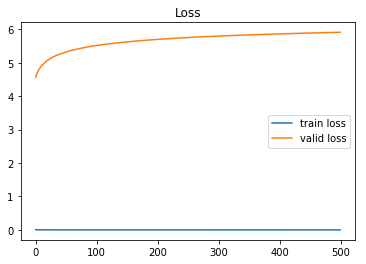

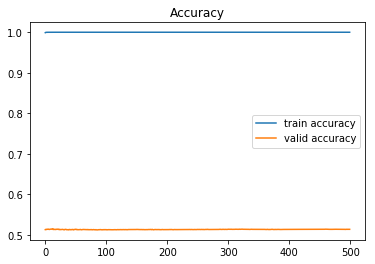

In [10]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()